# Julia
# Zadatak - Linearna regresija
### Za date podatke naći linearnu funkciju ("fit"-ovati pravu) koja ih najbolje predstavlja
---

# Podaci
### Podaci su dati kao dva niza vrednosti (X i Y). X predstavlja niz vrednosti nezavisne promenljive dok Y predstavlja niz vrednosti zavisne promenljive.
Primer:

X - Kilometraža pređena automobilom, Y - Cena goriva za pređeni put 

In [1]:
# generisanje N nasumicnih podataka sa nasumicnim dodatkom na svaki y_i od najvise var za primer predjenog puta i cene goriva
function generateData(N::Int64, var::Int64)
    X = []; Y = []
    potrosnja = 6.6
    cenaGoriva = 220

    X = sort([rand(100:600) for i in 1:N])
    Y = [x/100*potrosnja*cenaGoriva + rand(-var:var)  for x in X]

    return X, Y
end;

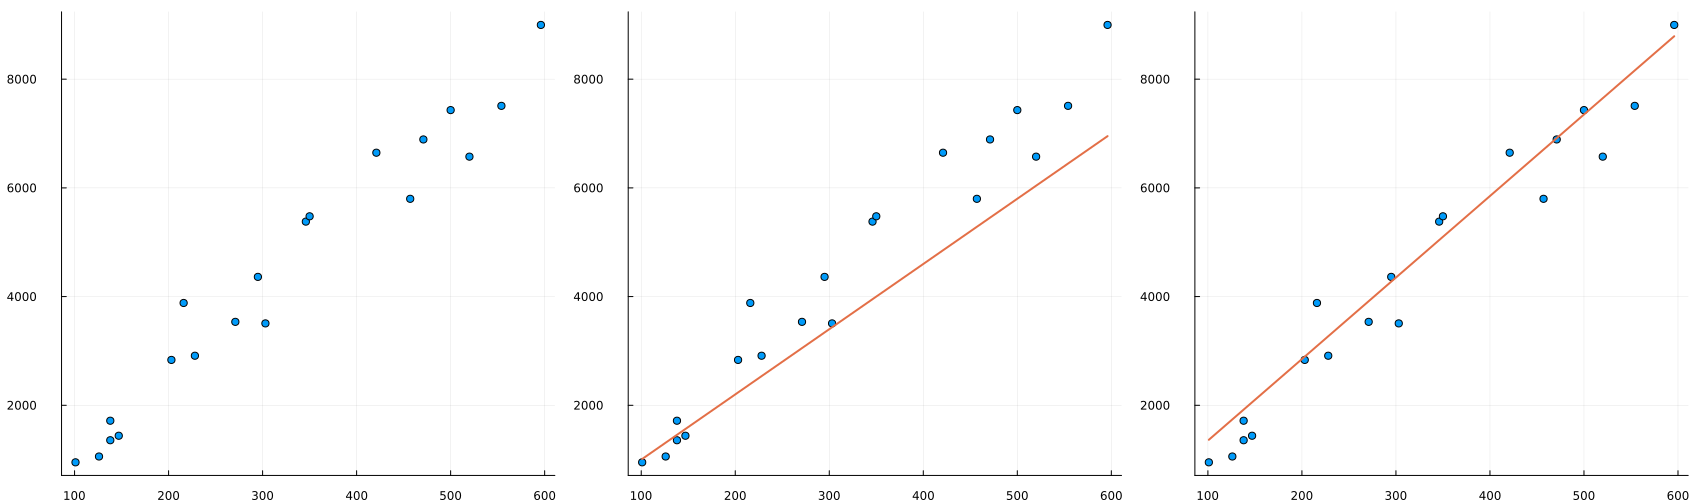

In [2]:
# Prikaz podataka
using Plots

N = 20;                                 # Broj podataka
X, Y = generateData(N, 1000);           # Generisanje podataka

k1 = 12; n1 = -200; k2 = 15; n2 = -150; # Neke pretpostavke za koeficijente

a = scatter(X, Y, label="")  
b = scatter(X, Y, label="")
plot!(X, X.*k1.+n1, label="", linewidth=2)
c = scatter(X, Y, label="")
plot!(X, X.*k2.+n2, label="", linewidth=2)

size = (1700, 500)  # Velicina ukupnog plota
plot(a, b, c, size=size, layout=(1,3))

# Fitovanje prave

Fitovana prava se može predstaviti funkcijom $f(x) = kx + n$. Zadatak je da se odrede koeficijenti $k$ i $n$ tako da se prava najbolje poklapa sa podacima.

Ako se dati podaci prestave kao skup tačaka gde je i-ta tačka $(x_i, y_i)$, tada se može reći da je 
$$y_i = f(x_i) + \varepsilon _i$$
gde je $\epsilon_i$ odstupanje i-te tačke od prave $f(x)$.

Kako odrediti te koeficijente $k$ i $n$ za pravu $f(x)$?


## Metod najmanjih kvadrata

Ovaj metod računa koeficijente $k$ i $n$ takve da je sume kvadrata odstupanja svih tačaka od prave minimalna.
$$\sum _{i=1}^{n}{\varepsilon}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i} - f(x_i))^{2}=\sum _{i=1}^{n}(y_{i} - kx_{i} - n)^{2}$$

Razvijanjem ovih izraza dobiju se sledeće formule za koeficijente [[1]](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)
$$ k = \frac {\sum _{i=1}^{n}(x_{i}- \bar{x})(y_{i}- \bar{y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2} $$
$$ n = \bar{y}- k\bar{x} $$
gde su $\bar{x}$ i $\bar{y}$ proseci vrednosti $x_i$ i $y_i$, respektivno


k = 15.210268947553073, n = -439.98030771680897


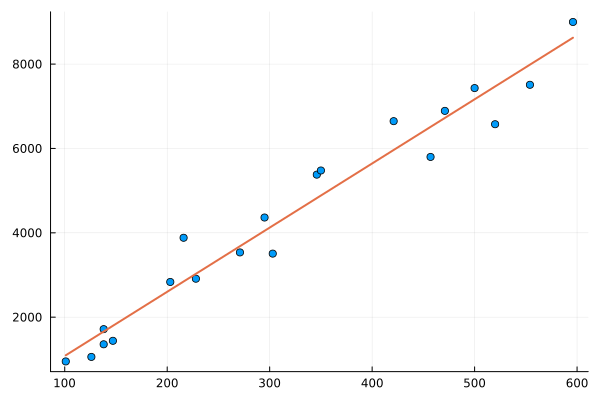

In [3]:
# Za date podatke X, Y vraca k, n koeficijente fitovane prave
function linReg(X, Y)
    N = length(X)
    # Racunanje proseka
    avgX, avgY = 0, 0;
    for i in 1:N
        avgX += X[i]; avgY += Y[i];
    end
    avgX /= N; avgY /= N;

    # Racunanje suma
    top = 0; bot = 0;
    for i in 1:N
        top += (X[i] - avgX) * (Y[i] - avgY);
        bot += (X[i] - avgX)^2;
    end

    # Racunanje koeficijenata
    k = top/bot;
    n = avgY - k * avgX;
    return k,n
end

k, n = linReg(X, Y)
println("k = ", k, ", n = ", n);
# Prikaz fitovanje linije
yy = k.*X .+ n
scatter(X, Y, label="");
plot!(X, yy, label="", linewidth=2)

# Matrično resenje

Kombinuju se jednačine za svaku tačku u sistem jednacina i predstavljaju se matrično

$$
Az = b
$$


Gde su matrice 
$$ A = 
\begin{bmatrix}
x_1 & 1\\
\vdots & \vdots\\
x_n & 1
\end{bmatrix}\!,\;\;
z = 
\begin{bmatrix}
k\\
n
\end{bmatrix}\!,\;\;
b = 
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$



Kako bi se odredila linearna regresija traži se srednje kvadratno rešenje datog sistema. Posto je srednje kvadratno rešenje jednako rešenju odgovarajućeg normalnog sistema [[2, teorema 1.7]](http://optimizacija.etf.rs/PDFs/Pseudoinverzne%20matrice%20i%20sistemi.pdf)

$$
A^T Az = A^T b
$$

rešenje normalnog sistema, a samim tim i srednje kvadratno rešenje je dato sa

$$
z = (A^T A)'A^T b
$$



k = 15.210268947553075, n = -439.9803077168108


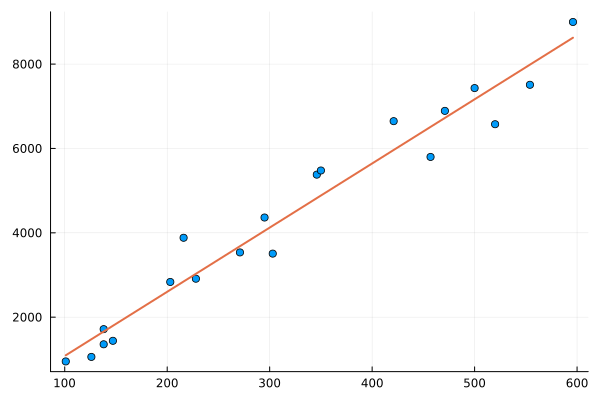

In [4]:
function linRegMat(X, Y)
    N = length(X)
    # Postavljanje u matrice 
    A = [X ones(Float64, N)]
    b = Y

    k, n = inv(A'*A)*A'b
    return k, n
end

k, n = linRegMat(X, Y)
println("k = ", k, ", n = ", n);
# Prikaz fitovane linije
yy = k.*X .+ n
scatter(X, Y, label="");
plot!(X, yy, label="", linewidth=2)

## Julija operator \\
U Juliji operator __\\__ na osnovu operanada bira algoritam koji će primeniti. U slučaju kvadratnih matrica će rešiti sistem LU dekompozicijom, a u slučaju pravougaonih matrica, kao prikazanom, će odrediti koeficijente $k$ i $n$ linearne regresije metodom najmanjih kvadrata (primenom QR faktorizacije) [[3]](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\\-Tuple{AbstractMatrix,%20AbstractVecOrMat}) što rezultuje istim koeficijentima kao prethodne dve metode

In [5]:
# Postavljanje u matrice 
A = [X ones(Float64, N)]
b = Y

# Izracunavanje koeficijenata
k_novi, n_novi = A \ b

# Uporedjivanje dobijenih koeficijenata sa prethodnim
println("novi k  = ", k_novi, ", novi n = ", n_novi);
println("stari k = ", k, ", stari n = ", n);

novi k  = 15.210268947553073, novi n = -439.9803077168083
stari k = 15.210268947553075, stari n = -439.9803077168108


Dobijeni su isti koeficijenti


---
# Zadatak - Kvadratna regresija
### Za date podatke naći parabolu koja ih najbolje predstavlja
---

# Podaci
### Podaci su dati kao dva niza vrednosti (X i Y) kao u prethodnom zadatku.

In [6]:
# generisanje N nasumicnih podataka sa nasumicnim dodatkom na svaki y_i od najvise var za primer predjenog puta i cene goriva
function generateDataQuadratic(N::Int64, var::Int64)
    potrosnja = 6.6
    cenaGoriva = 220

    X = sort([rand(1:100) for i in 1:N])
    Y = [x^2 + x/100*potrosnja*cenaGoriva + rand(-var:var) for x in X]

    return X, Y
end;

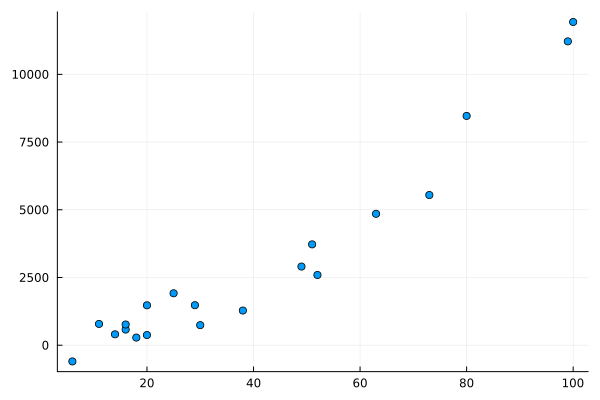

In [7]:
# Prikaz podataka
using Plots

N = 20;                                     # Broj podataka
X, Y = generateDataQuadratic(N, 1000);      # Generisanje podataka

scatter(X, Y, label="")

# Fitovanje parabole

Sada umesto prave se traži parabola koja zadovoljava podatke. 

Fitovana parabola se može predstaviti funkcijom $y = px^2 + qx + r$. Zadatak je da se odrede koeficijenti $p$, $q$ i $r$ tako da se parabola najbolje poklapa sa podacima.

## Matrično resenje 

Kombinuju se jednačine za svaku tačku u sistem jednacina i predstavljaju se matrično

$$
Az = b
$$


Gde su matrice 
$$ A = 
\begin{bmatrix}
x_1^2 & x_1 & 1\\
\vdots & \vdots & \vdots\\
x_n^2 & x_n & 1
\end{bmatrix}\!,\;\;
z = 
\begin{bmatrix}
p\\
q\\
r
\end{bmatrix}\!,\;\;
b = 
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$


Kako bi se odredila kvadratna regresija traži se srednje kvadratno rešenje datog sistema. Pošto je srednje kvadratno rešenje takođe rešenje odgovarajućeg normalnog sistema [[2, teorema 1.7]](http://optimizacija.etf.rs/PDFs/Pseudoinverzne%20matrice%20i%20sistemi.pdf)

$$
A^T Az = A^T b
$$

Rešenje normalnog sistema, a samim tim i srednje kvadratno rešenje je dato sa

$$
z = (A^T A)'A^T b
$$


p = 1.1652422422018365, q = -1.6325736058934126, r = 246.40268919576556

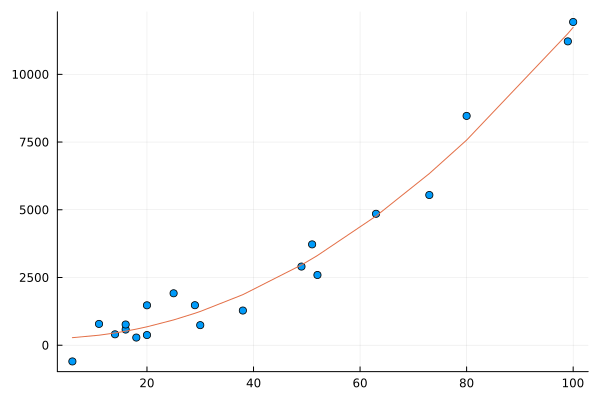

In [8]:
function linRegQuadratic(X, Y)
    N = length(X)
    # Postavljanje u matrice 
    A = [X.^2 X ones(Float64, N)]
    b = Y
    
    p,q,r = inv(A'A)A'b
    return p,q,r
end
    
p, q, r = linRegQuadratic(X, Y)
println("p = ", p, ", q = ", q, ", r = ", r);
# Prikaz fitovane parabole
yy = p.*(X.^2) .+ q.*X .+ r
scatter(X, Y, label="");
plot!(X, yy, label="")


# Literatura

1. [Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)
1. [Pseudoinverzne matrice i sistemi](http://optimizacija.etf.rs/PDFs/Pseudoinverzne%20matrice%20i%20sistemi.pdf)
1. [Julia LinearAlgebra documentation](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\\-Tuple{AbstractMatrix,%20AbstractVecOrMat)